# Proyecto: Producción no convencional de petróleo y gas en Argentina
## Notebook 1: Análisis exploratorio de datos
### Objetivo de la notebook:
Comprender mejor el dataset, su estructura, la presencia de datos faltantes y/o extremos, la distribución de las variables y la relación entre ellas. 

In [2]:
#importamos las librerías a utilizar en la notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapely
import fiona


## IMPORTACIÓN DE LOS DATOS
### Lectura del dataset de pozos hidrocarburíferos


In [4]:
#Lectura del archivo .csv y guardado con el nombre "pozos"
pozos= pd.read_csv('../Data/pozos.csv',delimiter=',',encoding='utf-8')
pozos


,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,156805,136.914000,1240.232000,166.780000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.858318,-39.007369,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2016,1,135209,29.080000,617.770000,32.280000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.849834,-39.020619,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
2,YSUR,2018,1,158256,271.874000,307.871000,115.570000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.823235,-39.011761,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2016,1,134010,51.350000,378.650000,11.500000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.862415,-39.022839,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
4,YSUR,2018,1,131068,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271665,ACO,2023,8,146101,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.963790,-38.460750,NO CONVENCIONAL,GAS PLUS,EXPLORACION,EXTENSION,TIGHT,2023-08-31
271666,ACO,2023,9,146101,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.963790,-38.460750,NO CONVENCIONAL,GAS PLUS,EXPLORACION,EXTENSION,TIGHT,2023-09-30
271667,ACO,2023,9,164503,240.171667,2006.971943,312.904842,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-68.085408,-38.211980,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORATORIO PROFUNDO,TIGHT,2023-09-30
271668,ACO,2023,9,164374,297.101504,3217.431504,4.941691,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-68.106619,-38.178494,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2023-09-30


# ---------------------------------------------------------------------------------------------------------------


## INSPECCIÓN DE LOS DATOS


In [4]:
#Vemos las primeras 5 filas
pozos.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,156805,136.914,1240.232,166.78,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.858318,-39.007369,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2016,1,135209,29.080,617.770,32.28,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.849834,-39.020619,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
2,YSUR,2018,1,158256,271.874,307.871,115.57,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.823235,-39.011761,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2016,1,134010,51.350,378.650,11.50,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.862415,-39.022839,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
4,YSUR,2018,1,131068,0.000,0.000,0.00,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


In [5]:
# Consultamos la cantidad de filas y columnas del dataset
pozos.shape

(271670, 40)

In [6]:
# Obtenemos el resumen del dataset
pozos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271670 entries, 0 to 271669
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idempresa               271670 non-null  object 
 1   anio                    271670 non-null  int64  
 2   mes                     271670 non-null  int64  
 3   idpozo                  271670 non-null  int64  
 4   prod_pet                271670 non-null  float64
 5   prod_gas                271670 non-null  float64
 6   prod_agua               271670 non-null  float64
 7   iny_agua                271670 non-null  float64
 8   iny_gas                 271670 non-null  float64
 9   iny_co2                 271670 non-null  float64
 10  iny_otro                271670 non-null  float64
 11  tef                     271670 non-null  float64
 12  vida_util               5758 non-null    float64
 13  tipoextraccion          271127 non-null  object 
 14  tipoestado          

In [7]:
# Obtenemos la cantidad de variables según el tipo de datos 
pozos.dtypes.value_counts() 

object     24
float64    12
int64       4
dtype: int64

<div class="alert alert-block alert-success">
El dataset de pozos hidrocarburíferos cuenta con 271.670 registros y 40 variables. 
Dentro de las variables, podemos observar que 4 son de tipo integer, 12 del tipo float y 24 de tipo object. 
 
También podemos ver que la mayoría de las columnas del dataset original no tienen datos faltantes.

</div>


In [10]:
#Obtenemos los nombres de las columnas del dataset
#No las renombramos porque son bastante explicativas
pozos.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [11]:
#Consultamos los niveles de las principales variables categóricas con que cuenta el dataset
lista_columnas_p = ['anio', 'mes','cuenca', 'provincia','tipo_de_recurso','empresa','idempresa',   'idpozo',  'sigla', 'tipopozo','tipoextraccion', 'tipoestado',
       'formacion','formprod','areapermisoconcesion','idareapermisoconcesion', 'areayacimiento', 'idareayacimiento', 'tipoextraccion', 'tipoestado', 
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data' ]

for i in lista_columnas_p:
    print('COLUMNA: ', i)
    print(pozos[i].unique())
    print('--> Cantidad de valores únicos: ', pozos[i].nunique())
    print('-'*100)

COLUMNA:  anio
[2018 2016 2015 2017 2022 2019 2009 2013 2014 2010 2008 2011 2012 2006
 2007 2023 2020 2021]
--> Cantidad de valores únicos:  18
----------------------------------------------------------------------------------------------------
COLUMNA:  mes
[ 1  2  3  4  5  6  7  8  9 10 11 12]
--> Cantidad de valores únicos:  12
----------------------------------------------------------------------------------------------------
COLUMNA:  cuenca
['NEUQUINA' 'GOLFO SAN JORGE' 'NOROESTE' 'AUSTRAL']
--> Cantidad de valores únicos:  4
----------------------------------------------------------------------------------------------------
COLUMNA:  provincia
['Rio Negro' 'Neuquén' 'Mendoza' 'Chubut' 'Santa Cruz' 'Salta']
--> Cantidad de valores únicos:  6
----------------------------------------------------------------------------------------------------
COLUMNA:  tipo_de_recurso
['NO CONVENCIONAL']
--> Cantidad de valores únicos:  1
------------------------------------------------------------

['NO CONVENCIONAL']
--> Cantidad de valores únicos:  1
----------------------------------------------------------------------------------------------------
COLUMNA:  proyecto
['Sin Proyecto' 'GAS PLUS']
--> Cantidad de valores únicos:  2
----------------------------------------------------------------------------------------------------
COLUMNA:  clasificacion
['EXPLOTACION' 'EXPLORACION' 'SERVICIO' nan]
--> Cantidad de valores únicos:  3
----------------------------------------------------------------------------------------------------
COLUMNA:  subclasificacion
['DESARROLLO' 'AVANZADA' 'EXPLORATORIO PROFUNDO' 'EXPLORACION' 'EXTENSION'
 'CONTROL' 'ESTUDIO' nan 'SUMIDERO']
--> Cantidad de valores únicos:  8
----------------------------------------------------------------------------------------------------
COLUMNA:  sub_tipo_recurso
['TIGHT' 'SHALE' nan]
--> Cantidad de valores únicos:  2
-------------------------------------------------------------------------------------------------

In [12]:
#Exploramos los años incluidos en el dataset, ordenados de menor a mayor
print(sorted(pozos['anio'].unique()))

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [13]:
#Obtenemos las estadísticas descriptivas básicas del datset
pozos.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad,coordenadax,coordenaday
count,271670.000000,271670.000000,271670.000000,271670.000000,271670.000000,271670.000000,271670.000000,271670.000000,271670.0,271670.0,271670.000000,5758.000000,271670.000000,271670.000000,271670.000000,271670.000000
mean,2018.742968,6.477936,148034.524596,228.726216,631.865710,135.723956,9.983405,1.950864,0.0,0.0,22.248209,213.118158,348.929024,3552.928023,-68.826602,-38.933339
std,3.629784,3.399240,19879.912879,742.333014,1548.704288,455.944538,488.048992,590.450229,0.0,0.0,12.075327,989.531472,74.944065,6853.382098,0.684113,2.325820
min,2006.000000,1.000000,3640.000000,-0.001000,-12.267000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.000000,0.000000,-71.357210,-69.415770
25%,2017.000000,4.000000,145093.000000,0.000000,9.290000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,334.000000,2820.000000,-69.187332,-38.856464
50%,2020.000000,7.000000,154567.000000,6.473286,115.815000,11.710000,0.000000,0.000000,0.0,0.0,29.343750,0.000000,334.000000,3160.000000,-68.873882,-38.545951
75%,2022.000000,9.000000,158435.000000,73.052647,513.065000,69.160000,0.000000,0.000000,0.0,0.0,30.670000,0.000000,381.000000,4092.000000,-68.452360,-38.323300
max,2023.000000,12.000000,164706.000000,16513.300000,29129.660000,17468.160000,46907.780000,219701.660000,0.0,0.0,79.340000,11415.210000,476.000000,378939.000000,-38.590070,-24.116560


# ---------------------------------------------------------------------------------------------------------------

## VISUALIZACIÓN DE LOS DATOS

### Visualizar la distribución de las variables numéricas mediante histogramas

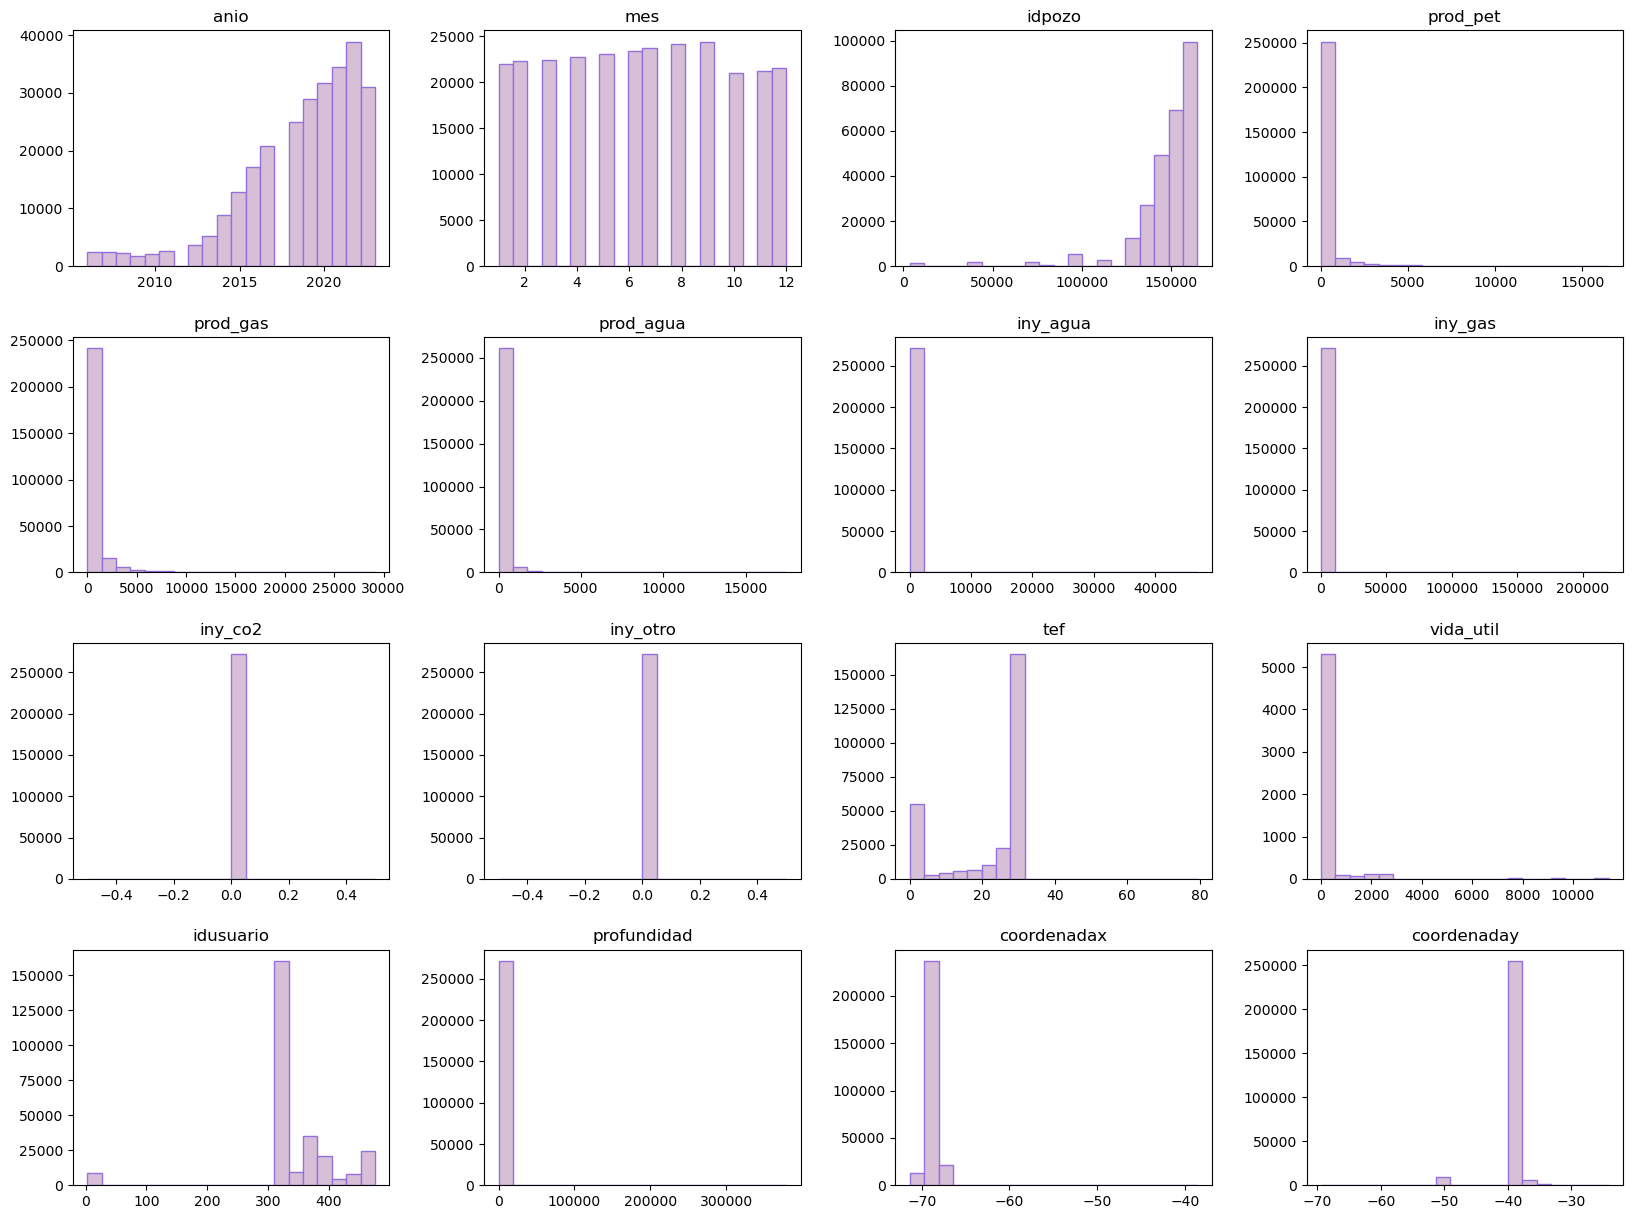

In [14]:
#Graficamos los histogramas de todas las variables numéricas del dataset
hist=pozos.hist(bins=20, figsize=(20, 15),grid=False,  color = "thistle", ec="mediumpurple", lw=1)


<div class="alert alert-block alert-success">
  
Del análisis visual de los histogramas se desprende que la mayoría de las variables numéricas de interés (producción de petróleo, producción de gas, producción de agua, inyección de agua e inyección de gas) presentan una distribución asimétrica hacia la derecha, con la mayor frecuencia de ocurrencia hacia los menores valores. Asimismo, queda claro que sería interesante/necesario escalar las variables para unificar las escalas de las mismas.  </div>

### Visualizar la distribución de las variables numéricas mediante diagramas de caja (box plots)

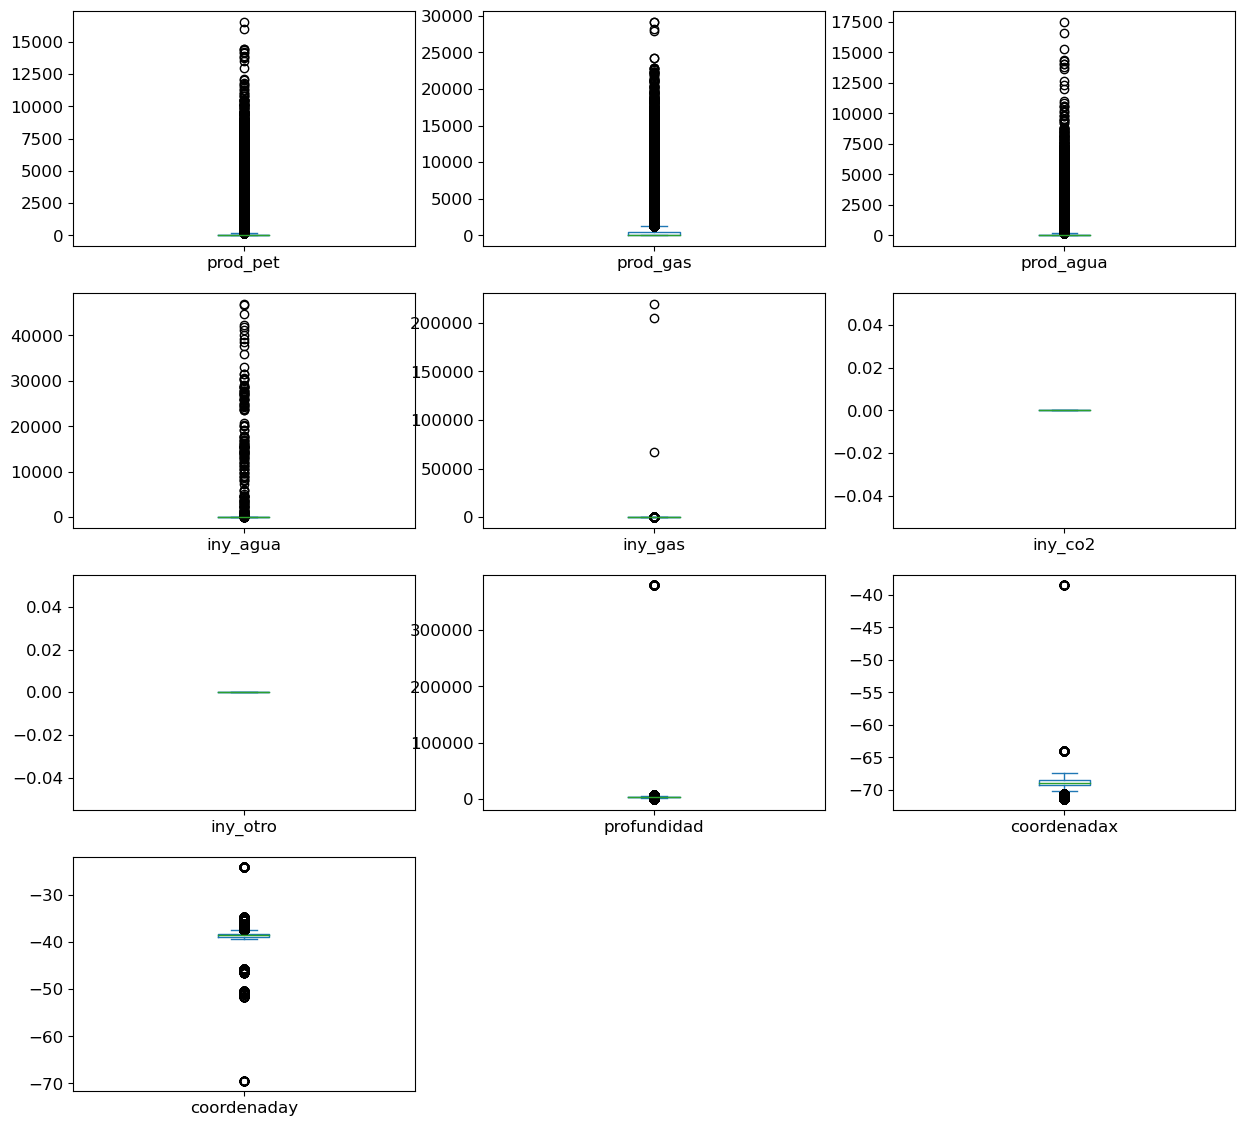

In [15]:
plt= pozos[['prod_pet','prod_gas', 'prod_agua', 'iny_agua', 'iny_gas',
       'iny_co2', 'iny_otro','profundidad', 'coordenadax','coordenaday']].plot(kind= 'box' , subplots=True, layout=(7,3), sharex=False, sharey=False,fontsize=12,figsize=(15,25))

<div class="alert alert-block alert-success">
Estos diagramas nos permiten confirmar la asimetría en la distribución de las variables relacionadas a la producción, que los datos se concentran en la parte inferior de las distribuciones y que los valores atípicos se ubican más allá del límite superior en todas las variables salvo las referentes a las coordenadas geográficas de los pozos.
    
    
Sin embargo podemos advertir, a priori, que esta gran dispersión en los datos probablemente se deba a que el dataset incluye datos de diferentes provincias y yacimientos. Seguramente un agrupamiento de los datos, nos permitirá observar mejor el comportamiento de los mismos. 
    
    
También confirmamos que los datos de inyección relevantes para el análisis sólo podrían ser la inyección de agua y la inyección de gas. Sin embargo, habría que evaluarlo también.
    
    
Por otro lado, advertimos que hay uno o varios datos de profundidad, de latitud y de longitud que sí parecen ser valores extremos, probablemente debido a algún error en el dataset</div>

# ---------------------------------------------------------------------------------------------------------------

## Análisis agrupado


### Producción por provincia

In [20]:
#Agrupamos los valores de producción por provincia. 
prod_provincia= pozos.groupby('provincia').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_provincia

,prod_gas,prod_pet
provincia,,
Chubut,0.009739,0.003170
Mendoza,0.448631,0.085311
Neuquén,152.872629,59.672466
Rio Negro,11.218764,2.127919
Salta,0.001365,0.009297
Santa Cruz,7.107830,0.239888


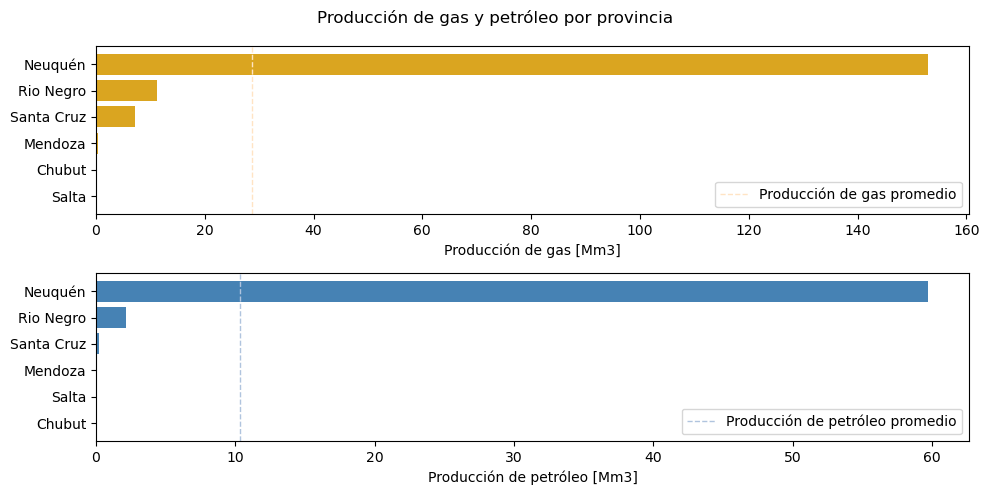

In [28]:
#Creamos un dataframe que contenga las provincias con mayor producción de gas de todo el dataset
prod_provincia_gas = prod_provincia.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

#Creamos un dataframe que contenga las provincias con mayor producción de petróleo de todo el dataset
prod_provincia_pet = prod_provincia.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Graficamos las producciones de gas y petróleo para ver cuáles son las provincias con mayor producción
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.suptitle('Producción de gas y petróleo por provincia')


# Subgráfico de producción de gas
axs[0].barh(prod_provincia_gas['provincia'], prod_provincia_gas['prod_gas'], color='goldenrod')
axs[0].set_xlabel('Producción de gas [Mm3]',  fontsize=10, color='black')
axs[0].invert_yaxis()
axs[0].axvline(x=np.nanmean(prod_provincia_gas.prod_gas), color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
axs[0].legend(loc='best', ncols=1)

# Subgráfico de producción de petróleo
axs[1].barh(prod_provincia_pet['provincia'], prod_provincia_pet['prod_pet'], color='steelblue')
axs[1].set_xlabel('Producción de petróleo [Mm3]',fontsize=10, color='black')
axs[1].invert_yaxis()
axs[1].axvline(x=np.nanmean(prod_provincia_pet.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')
axs[1].legend(loc='best', ncols=1)

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### Producción por empresas

In [26]:
#Agrupamos los valores de producción por empresa. 
prod_empresa = pozos.groupby('empresa').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_empresa

,prod_gas,prod_pet
empresa,,
AMERICAS PETROGAS ARGENTINA S.A.,0.011090,0.032912
APACHE ENERGIA ARGENTINA S.R.L.,5.623245,0.553356
APCO OIL AND GAS INTERNATIONAL INC (SUCURSAL ARGENTINA),0.000000,0.000000
ARGENTA ENERGIA S.A.,0.000064,0.000161
CAPETROL ARGENTINA S.A.,0.000442,0.000724
CAPEX S.A.,4.024910,0.278337
CGC ENERGIA SAU,0.031649,0.009878
CHEVRON ARGENTINA S.R.L.,0.442098,0.335575
COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.,6.890367,0.220781


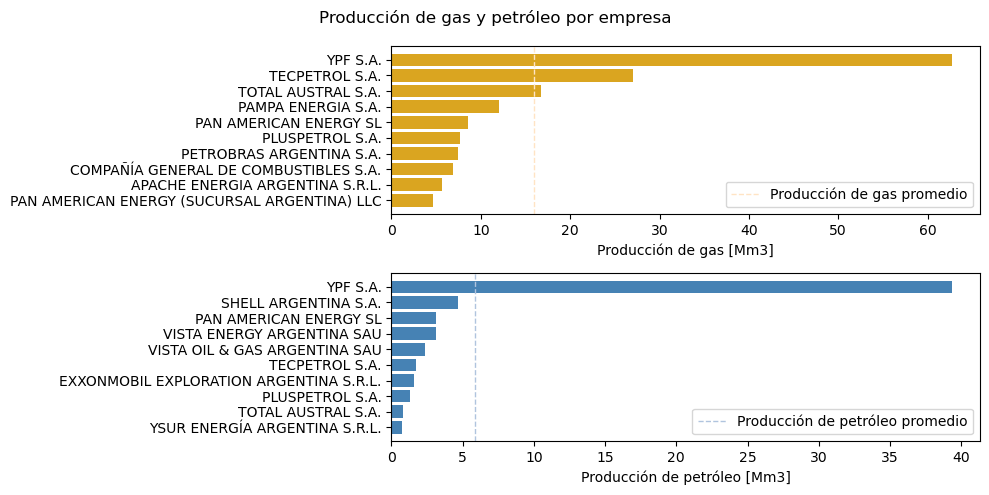

In [29]:
#Creamos un dataframe que contenga las 10 empresas con mayor producción de gas de todo el dataset
prod_empresa_gas = prod_empresa.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

#Creamos un dataframe que contenga las 10 empresas con mayor producción de petróleo de todo el dataset
prod_empresa_pet = prod_empresa.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Graficamos las producciones de gas y petróleo para ver cuáles son las empresas con mayor producción
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.suptitle('Producción de gas y petróleo por empresa')

# Subgráfico de producción de gas
axs[0].barh(prod_empresa_gas['empresa'], prod_empresa_gas['prod_gas'], color='goldenrod')
axs[0].set_xlabel('Producción de gas [Mm3]',  fontsize=10, color='black')
axs[0].invert_yaxis()
axs[0].axvline(x=np.nanmean(prod_empresa_gas.prod_gas), color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
axs[0].legend(loc='best', ncols=1)

# Subgráfico de producción de petróleo
axs[1].barh(prod_empresa_pet['empresa'], prod_empresa_pet['prod_pet'], color='steelblue')
axs[1].set_xlabel('Producción de petróleo [Mm3]',fontsize=10, color='black')
axs[1].invert_yaxis()
axs[1].axvline(x=np.nanmean(prod_empresa_pet.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')
axs[1].legend(loc='best', ncols=1)
# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### Producción por formación geológica

In [32]:
#Agrupamos los valores de producción por formación geológica. 
prod_formacion = pozos.groupby('formacion').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_formacion

,prod_gas,prod_pet
formacion,,
ANITA,0.040708,0.001147
agrio,6.311271,0.066550
basamento,0.367987,0.011805
centenario,0.000000,0.000000
chachao,0.000000,0.001118
formación improductiva,0.067640,0.012190
grupo chubut,0.008875,0.001067
lajas,33.616758,2.327700
loma montosa,0.000000,0.000000


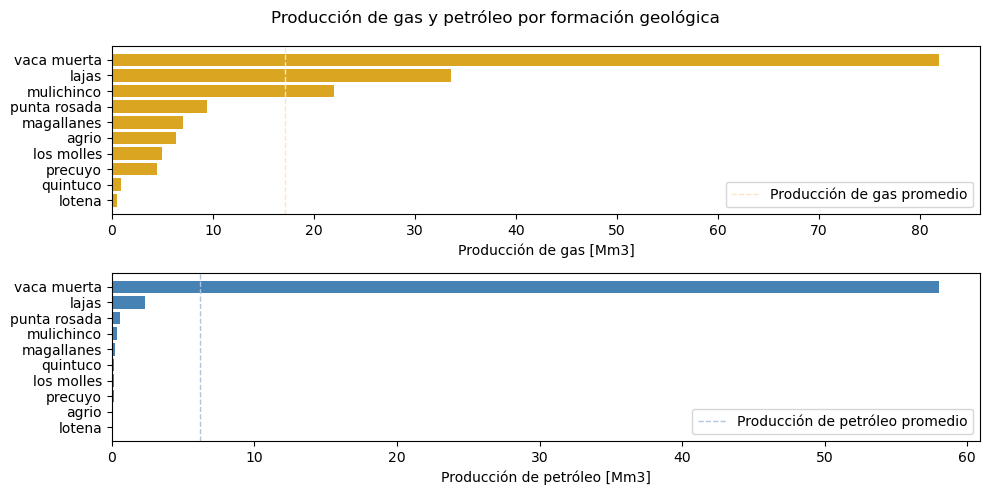

In [34]:
#Creamos un dataframe que contenga las 10 formaciones geológicas con mayor producción de gas de todo el dataset
prod_formacion_gas = prod_formacion.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

#Creamos un dataframe que contenga las 10 formaciones geológicas con mayor producción de petróleo de todo el dataset
prod_formacion_pet = prod_formacion.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Graficamos las producciones de gas y petróleo para ver cuáles son las formaciones geológicas con mayor producción
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.suptitle('Producción de gas y petróleo por formación geológica')

# Subgráfico de producción de gas
axs[0].barh(prod_formacion_gas['formacion'], prod_formacion_gas['prod_gas'], color='goldenrod')
axs[0].set_xlabel('Producción de gas [Mm3]',  fontsize=10, color='black')
axs[0].invert_yaxis()
axs[0].axvline(x=np.nanmean(prod_formacion_gas.prod_gas), color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
axs[0].legend(loc='best', ncols=1)

# Subgráfico de producción de petróleo
axs[1].barh(prod_formacion_pet['formacion'], prod_formacion_pet['prod_pet'], color='steelblue')
axs[1].set_xlabel('Producción de petróleo [Mm3]',fontsize=10, color='black')
axs[1].invert_yaxis()
axs[1].axvline(x=np.nanmean(prod_formacion_pet.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')
axs[1].legend(loc='best', ncols=1)

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### Producción por cuenca

In [37]:
#Agrupamos los valores de producción por cuenca. 
prod_cuenca= pozos.groupby('cuenca').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_cuenca

,prod_gas,prod_pet
cuenca,,
AUSTRAL,7.076053,0.229948
GOLFO SAN JORGE,0.041516,0.013110
NEUQUINA,164.540024,61.885696
NOROESTE,0.001365,0.009297


In [38]:
#Identificamos qué provincias están comprendidas en cada cuenca
pozos.groupby(by=['cuenca','provincia'])['prod_gas'].sum()

cuenca           provincia 
AUSTRAL          Santa Cruz    7.076053e+06
GOLFO SAN JORGE  Chubut        9.738914e+03
                 Santa Cruz    3.177675e+04
NEUQUINA         Mendoza       4.486309e+05
                 Neuquén       1.528726e+08
                 Rio Negro     1.121876e+07
NOROESTE         Salta         1.364741e+03
Name: prod_gas, dtype: float64

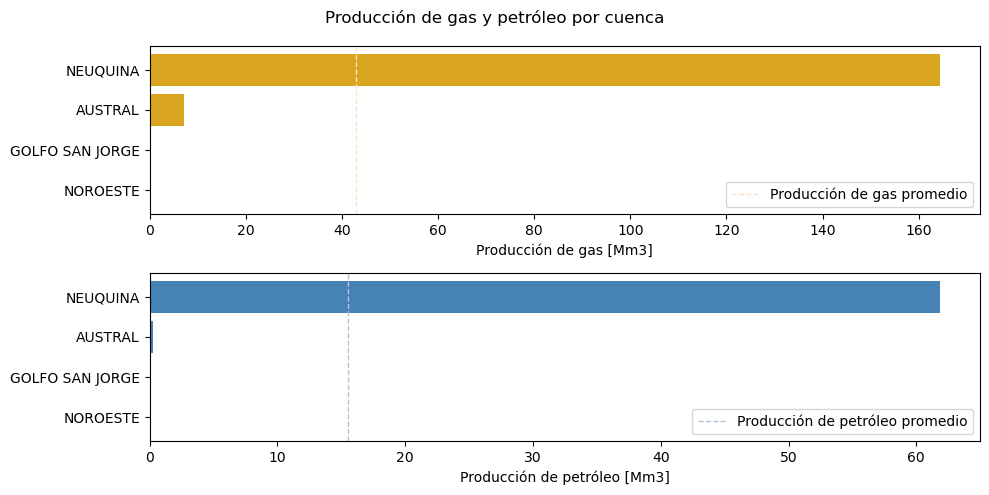

In [39]:
#Creamos un dataframe que contenga las cuencas con mayor producción de gas de todo el dataset
prod_cuenca_gas = prod_cuenca.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

#Creamos un dataframe que contenga las cuencas con mayor producción de petróleo de todo el dataset
prod_cuenca_pet = prod_cuenca.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Graficamos las producciones de gas y petróleo para ver cuáles son las cuencas con mayor producción
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.suptitle('Producción de gas y petróleo por cuenca')

# Subgráfico de producción de gas
axs[0].barh(prod_cuenca_gas['cuenca'], prod_cuenca_gas['prod_gas'], color='goldenrod')
axs[0].set_xlabel('Producción de gas [Mm3]',  fontsize=10, color='black')
axs[0].invert_yaxis()
axs[0].axvline(x=np.nanmean(prod_cuenca_gas.prod_gas), color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
axs[0].legend(loc='best', ncols=1)

# Subgráfico de producción de petróleo
axs[1].barh(prod_cuenca_pet['cuenca'], prod_cuenca_pet['prod_pet'], color='steelblue')
axs[1].set_xlabel('Producción de petróleo [Mm3]',fontsize=10, color='black')
axs[1].invert_yaxis()
axs[1].axvline(x=np.nanmean(prod_cuenca_pet.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')
axs[1].legend(loc='best', ncols=1)

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### Cantidad de pozos según su estado de producción

In [5]:
#Agrupamos cantidad de pozos por estado del pozo. 
#Ordenamos de mayor a menor
prod_estado_pozo=pozos.groupby('tipoestado').agg({'idpozo': 'count'}).sort_values(by='idpozo', ascending=False)
prod_estado_pozo

,idpozo
tipoestado,
Extracción Efectiva,226264
En Estudio,17054
Parado Transitoriamente,14648
Otras Situación Inactivo,2640
Abandonado,2035
En Reserva de Gas,1939
En Espera de Reparación,1550
Otras Situación Activo,1525
A Abandonar,1460


# ---------------------------------------------------------------------------------------------------------------

### Análisis temporal


En esta sección exploraremos la producción de petróleo y gas desde el año 2006 al año 2023

### Producción por año

In [43]:
# Calculamos la producción de gas y petroleo por año
lista_columnas = ['anio','prod_pet', 'prod_gas','prod_agua', 'iny_agua', 'iny_gas']
prod_anio= pozos[lista_columnas].groupby('anio').sum()/1000
prod_anio

,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas
anio,,,,,
2006,15.402226,430.208857,11.735689,0.000000,0.000000
2007,21.025760,420.793033,20.038190,0.000000,0.000000
2008,40.105372,707.881990,37.112761,0.000000,0.000000
2009,66.100557,1031.207066,68.249420,0.000000,0.000000
2010,66.852732,1253.515265,77.164988,0.000000,0.000000
2011,145.190414,1860.031345,178.478132,0.000000,0.000000
2012,304.021225,2411.892987,303.726648,15.588320,0.000000
2013,556.467411,2938.310318,574.267376,3.039600,0.000000
2014,1122.294071,4963.577471,1059.632301,0.000000,0.000000


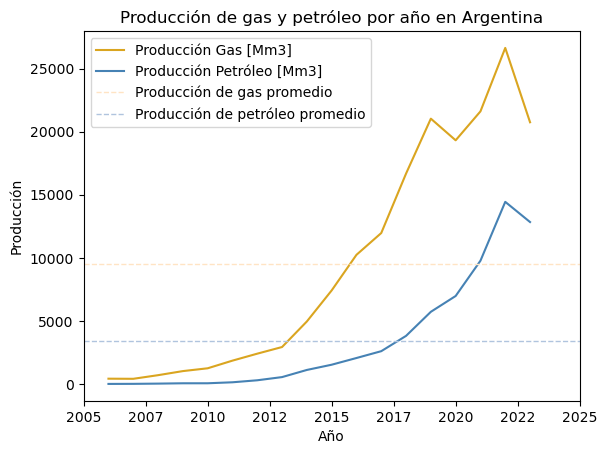

In [44]:
# graficamos la producción por año
plt.plot(prod_anio.index, prod_anio['prod_gas'], color='goldenrod', label='Producción Gas [Mm3]')
plt.plot(prod_anio.index, prod_anio['prod_pet'], color='steelblue', label='Producción Petróleo [Mm3]')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.axhline(y=np.nanmean(prod_anio.prod_gas),color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
plt.axhline(y=np.nanmean(prod_anio.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')

# agregamos etiquetas y leyenda a la gráfica
plt.xlabel('Año')
plt.ylabel('Producción')
plt.title('Producción de gas y petróleo por año en Argentina')
plt.legend()

# mostramos la gráfica
plt.show()

<div class="alert alert-block alert-success">
Habrá que tener en cuenta para la limpieza de datos eliminar los registros correspondientes al año 2023 ya que generan la falsa interpretación de una baja en la producción debido a que el dataset no comprende la producción del año completo. 
</div>

### Producción por mes

In [47]:
# Calculamos la producción de gas y petróleo por mes
lista_columnas = ['mes','prod_pet', 'prod_gas','prod_agua', 'iny_agua', 'iny_gas']
prod_mes = pozos[lista_columnas].groupby('mes').sum()/1000000
prod_mes 

,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas
mes,,,,,
1,5.091602,13.749714,2.841537,0.232535,0.002526
2,4.707261,12.621457,2.626507,0.206276,0.001825
3,5.264086,13.855492,3.038379,0.232601,0.207287
4,5.058417,13.392385,2.894293,0.220773,0.288567
5,5.310667,14.824442,3.133771,0.224884,0.003311
6,5.263946,15.089065,3.127229,0.206033,0.004436
7,5.586782,15.975920,3.511025,0.227972,0.004610
8,5.805312,16.650194,3.691034,0.279491,0.005542
9,5.823604,15.834777,3.562537,0.303166,0.005919


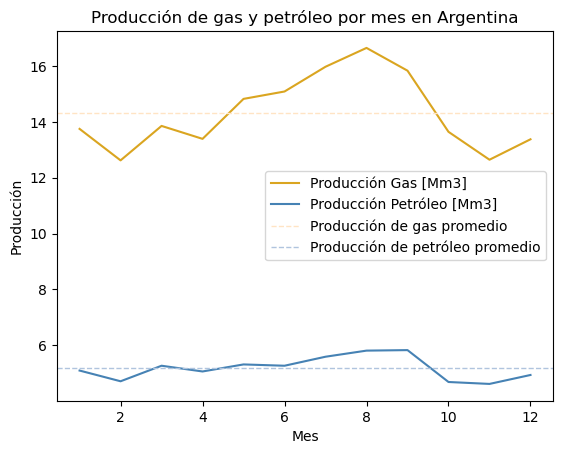

In [48]:
# graficamos la producción por mes
plt.plot(prod_mes.index, prod_mes['prod_gas'], color='goldenrod', label='Producción Gas [Mm3]')
plt.plot(prod_mes.index, prod_mes['prod_pet'], color='steelblue', label='Producción Petróleo [Mm3]')
plt.axhline(y=np.nanmean(prod_mes.prod_gas),color='bisque', linestyle='--', linewidth=1, label='Producción de gas promedio')
plt.axhline(y=np.nanmean(prod_mes.prod_pet), color='lightsteelblue', linestyle='--', linewidth=1, label='Producción de petróleo promedio')

# agregamos etiquetas y leyenda a la gráfica
plt.xlabel('Mes')
plt.ylabel('Producción')
plt.title('Producción de gas y petróleo por mes en Argentina')
plt.legend()

# mostramos la gráfica
plt.show()

### Análisis espacial

In [49]:
#Creamos un geodataframe a partir de las coordenadas geográficas del dataset de pozos
geo_pozos = gpd.GeoDataFrame(pozos, geometry=gpd.points_from_xy(pozos.coordenadax, pozos.coordenaday), crs="EPSG:4326")

In [50]:
#Consultamos las primeras 5 filas del geodataframe
geo_pozos.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,geometry
0,YSUR,2018,1,156805,136.914,1240.232,166.78,0.0,0.0,0.0,...,Rio Negro,-67.858318,-39.007369,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,POINT (-67.85832 -39.00737)
1,YSUR,2016,1,135209,29.080,617.770,32.28,0.0,0.0,0.0,...,Rio Negro,-67.849834,-39.020619,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,POINT (-67.84983 -39.02062)
2,YSUR,2018,1,158256,271.874,307.871,115.57,0.0,0.0,0.0,...,Rio Negro,-67.823235,-39.011761,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,POINT (-67.82324 -39.01176)
3,YSUR,2016,1,134010,51.350,378.650,11.50,0.0,0.0,0.0,...,Rio Negro,-67.862415,-39.022839,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,POINT (-67.86241 -39.02284)
4,YSUR,2018,1,131068,0.000,0.000,0.00,0.0,0.0,0.0,...,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,POINT (-67.87857 -39.00975)


In [53]:
#Leemos el shapefile correspondiente a las provincias de Argentina para poder contextualizar la ubicación de los pozos
geo_provincias = gpd.read_file('../shapefiles/provincia.shp')


In [54]:
#Observamos las primeras 5 filas del shapefile de provincias
geo_provincias.head()

,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,5,0,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."


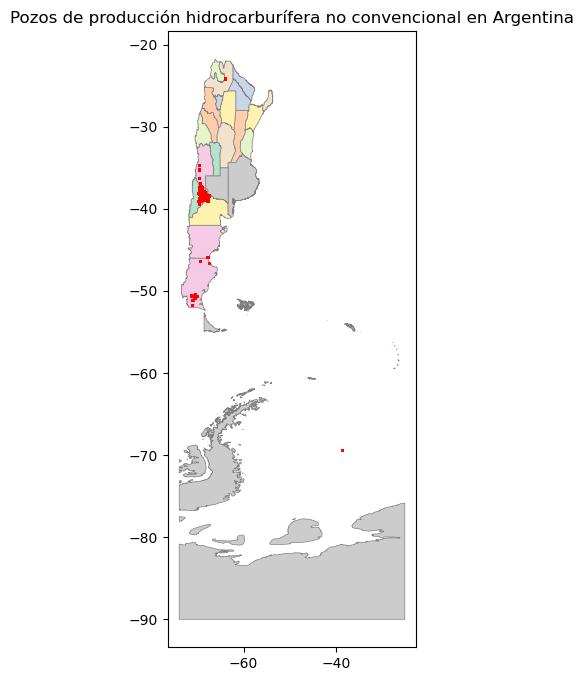

In [55]:
# Mapeamos los pozos hidrocarburíferos sobre la capa de provincias
fig, ax = plt.subplots(figsize=(10,8))
geo_provincias.plot( ax= ax, cmap='Pastel2', edgecolor='grey',linewidth = 0.5)
plt.scatter(pozos.coordenadax, pozos.coordenaday,c = 'red', marker = 'p',s = 0.5)
plt.title('Pozos de producción hidrocarburífera no convencional en Argentina')
plt.show();

Vemos que hay un pozo fuera de los límites del país

# ---------------------------------------------------------------------------------------------------------------

### Relación entre variables: matriz de correlación

In [57]:
#Calculamos la matriz de correlación para las variables numéricas
corr = pozos[['prod_pet','prod_gas', 'prod_agua', 'iny_agua', 'iny_gas','profundidad']].corr()

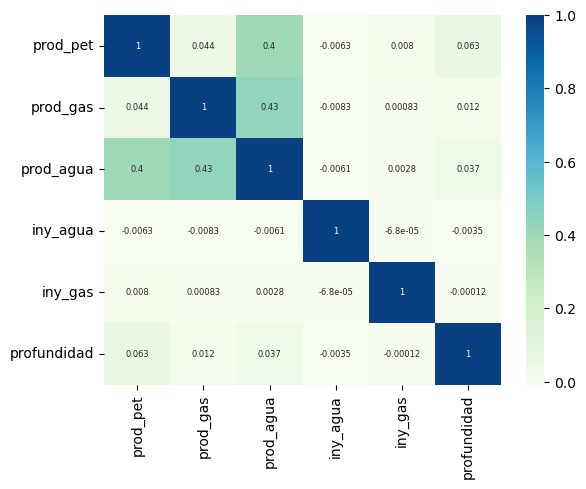

In [58]:
#Representación visual de la matriz de correlación
sns.heatmap(corr, annot=True, annot_kws = {'size': 6}, cmap = 'GnBu')
plt.show()


<div class="alert alert-block alert-success">
La matriz de correlación muestra los valores de correlación, que son los que miden el grado de relación lineal entre cada par de variables. 

* Podemos observar que los mayores valores de correlación son positivos, es decir que las variables tienden a aumentar al mismo tiempo. 
    
* La mayoría de las variables numéricas analizadas tienen valores de correlación cercanos a 0, lo cual indicaría muy baja relación líneal entre ellas.
    
* Tanto la producción de petróleo y como la de gas presentan mayor correlación con la producción de agua.     
</div>

# ---------------------------------------------------------------------------------------------------------------

### Lectura del dataset de fracturas hidraúlicas

In [60]:
#Lectura del archivo .csv y guardado con el nombre "fracturas"
fracturas = pd.read_csv('fracturas.csv')
fracturas

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,4253,164653,YPF.Nq.LCav-113(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3830.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3577,4254,164654,YPF.Nq.LCav-114(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3638.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3578,4255,164456,PLU.Nq.LCa-3098(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2587.0,...,2023-10-24 12:37:12.445477,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023
3579,4256,164528,PLU.Nq.LCa-3099(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2654.0,...,2023-10-24 12:39:58.392624,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023



### Inspección del dataset de fracturas hidraúlicas


In [61]:
#Vemos las primeras 5 filas
fracturas.head()

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017


In [62]:
# Consultamos la cantidad de filas y columnas del dataset
fracturas.shape

(3581, 30)

In [63]:
# Obtenemos el resumen del dataset
fracturas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_base_fractura_adjiv        3581 non-null   int64  
 1   idpozo                        3581 non-null   int64  
 2   sigla                         3581 non-null   object 
 3   cuenca                        3581 non-null   object 
 4   areapermisoconcesion          3581 non-null   object 
 5   yacimiento                    3581 non-null   object 
 6   formacion_productiva          3581 non-null   object 
 7   tipo_reservorio               3544 non-null   object 
 8   subtipo_reservorio            2671 non-null   object 
 9   longitud_rama_horizontal_m    3581 non-null   float64
 10  cantidad_fracturas            3581 non-null   int64  
 11  tipo_terminacion              3581 non-null   object 
 12  arena_bombeada_nacional_tn    3581 non-null   float64
 13  are

In [64]:
# Obtenemos la cantidad de variables según el tipo de datos 
fracturas.dtypes.value_counts() 

object     12
int64      11
float64     7
dtype: int64

<div class="alert alert-block alert-success">
El dataset de fracturas cuenta con 3.581 registros y 30 variables. 
Dentro de las variables, podemos observar que 11 son de tipo integer, 7 del tipo float y 12 de tipo object. 
 
También podemos ver que la gran mayoría de las columnas del dataset original no tienen datos faltantes.

</div>


In [65]:
#Obtenemos los nombres de las columnas del dataset
#No las renombramos porque son bastante explicativas
fracturas.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio'],
      dtype='object')

In [66]:
#Consultamos los niveles de las principales variables categóricas con que cuenta el dataset
lista_columnas_f = ['anio','mes', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp','anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante' ]

for i in lista_columnas_f:
    print('COLUMNA: ', i)
    print(fracturas[i].unique())
    print('--> Cantidad de valores únicos: ', fracturas[i].nunique())
    print('-'*100)

COLUMNA:  anio
[2019 2018 2017 2015 2014 2016 2013 2012 2011 2010 2009 2020 2006 2021
 2001 2022 2023]
--> Cantidad de valores únicos:  17
----------------------------------------------------------------------------------------------------
COLUMNA:  mes
[ 4 11  1  9  8  3  7  2  5 10 12  6]
--> Cantidad de valores únicos:  12
----------------------------------------------------------------------------------------------------
COLUMNA:  idpozo
[159910 159219 159220 ... 164456 164528 164554]
--> Cantidad de valores únicos:  3378
----------------------------------------------------------------------------------------------------
COLUMNA:  sigla
['APS.Nq.ADC.xp-1033' 'YPF.Nq.AdlA-1001(h)' 'YPF.Nq.AdlA-1002(h)' ...
 'PLU.Nq.LCa-3098(h)' 'PLU.Nq.LCa-3099(h)' 'PLU.Nq.LCa-3100(h)']
--> Cantidad de valores únicos:  3339
----------------------------------------------------------------------------------------------------
COLUMNA:  cuenca
['NEUQUINA' 'AUSTRAL' 'GOLFO SAN JORGE']
--> Cantidad de val

In [67]:
#Exploramos los años incluidos en el dataset, ordenados de menor a mayor
print(sorted(fracturas['anio'].unique()))

[2001, 2006, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [68]:
#Obtenemos las estadísticas descriptivas básicas del datset
fracturas.describe()

,id_base_fractura_adjiv,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,mes,anio
count,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3530.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000
mean,2191.830494,147224.518291,861.778125,15.270316,2784.523157,419.286596,20365.412517,7.465951,8315.383929,17542.459049,2017.020665,6.459090,2017.065066,6.504328,2019.945825,7.528344,6.459090,2017.020665
std,1247.395728,34379.553007,1132.811662,16.578241,4029.004767,867.463942,30983.529096,43.571922,4980.228204,14611.619100,3.697669,3.400347,3.704287,3.388907,1.421649,2.832985,3.400347,3.697669
min,30.000000,458.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.000000,2006.000000,1.000000,2019.000000,1.000000,1.000000,2001.000000
25%,1229.000000,147163.000000,0.000000,2.000000,0.000000,0.000000,245.500000,0.000000,5562.000000,1449.000000,2014.000000,4.000000,2014.000000,4.000000,2019.000000,6.000000,4.000000,2014.000000
50%,2185.000000,158378.000000,0.000000,6.000000,138.800000,42.140000,4282.200000,0.000000,8948.000000,18000.000000,2017.000000,6.000000,2017.000000,7.000000,2019.000000,8.000000,6.000000,2017.000000
75%,3304.000000,162029.000000,1993.000000,27.000000,5592.000000,606.195000,38728.070000,0.000000,11450.000000,28000.000000,2020.000000,9.000000,2021.000000,9.000000,2021.000000,10.000000,9.000000,2020.000000
max,4257.000000,164660.000000,4477.000000,87.000000,17146.998000,11839.640000,537184.600000,560.000000,209640.559334,50000.000000,2023.000000,12.000000,2023.000000,12.000000,2023.000000,12.000000,12.000000,2023.000000


In [69]:
fracturas_num = fracturas.select_dtypes(include='number')
fracturas_num.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga', 'mes',
       'anio'],
      dtype='object')

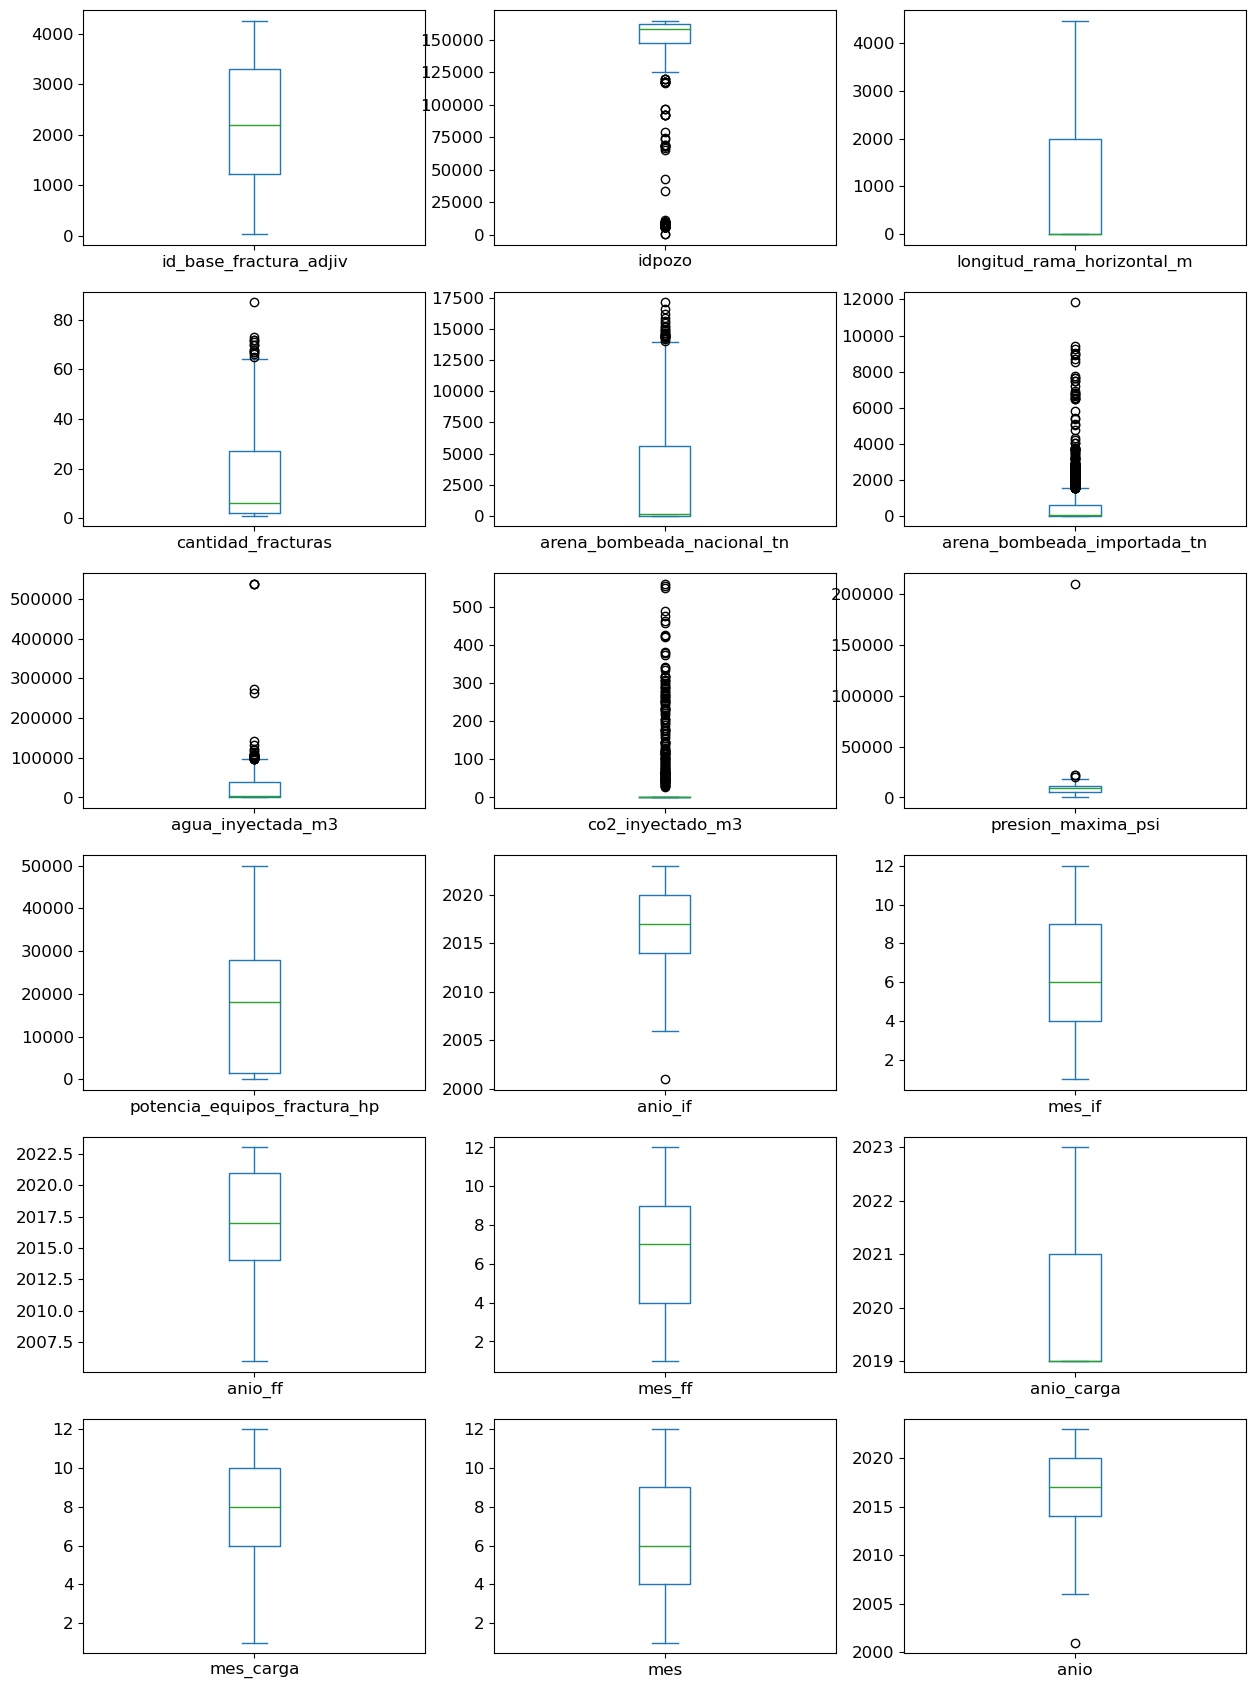

In [70]:
plt= fracturas[['id_base_fractura_adjiv', 'idpozo', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga', 'mes',
       'anio']].plot(kind= 'box' , subplots=True, layout=(7,3), sharex=False, sharey=False,fontsize=12,figsize=(15,25))

# ---------------------------------------------------------------------------------------------------------------

## CONCLUSIÓN DE LA EXPLORACIÓN Y PROCESAMIENTO DE LOS DATOS



El dataset de pozos hidrocarburíferos incluye:
    
    * 18 años (2006 a 2023)
    * los 12 meses del año
    * 4 cuencas hidrocarburíferas
    * 6 provincias argentinas
    * únicamente explotaciones no convencionales
    * 41 empresas involucradas
    * 3.692 pozos (cantidad idpozo), entre pozos gasíferos, petrolíferos, de inyección de gas o agua, sumideros o de otro tipo. 
    * La producción se extrae mediante 6 modalidades. 
    * Pozos en extracción efectiva como abandonados y otras situaciones intermedias.  
    * 25 formaciones geológicas
    
    


Podemos observar que el dataset de fracturas hidraúlicas incluye:
    
    * 17 años (2001 a 2023, periodo continuo de 15 años de 2009 a 2023)
    * los 12 meses del año
    * 3 cuencas hidrocarburíferas
    * explotaciones convencionales y no convencionales
    * 3.378 pozos (cantidad idpozo)
    * longitud de rama de la fractura
    * cantidad de fracturas por pozo
    * volumen de arena nacional bombeada (m3)
    * volumen de arena importada bombeada (m3)
    * volumen de agua inyectada (m3)
    * volumen de CO2 inyectado (m3)
    
    

<div class="alert alert-block alert-success">
A partir de la inspección de la estructura del dataset, de los tipos de variables, de la distribución de los datos, del resumen estadístico de los mismos y del análisis de gráficos y mapas, pudimos identificar situaciones a tratar con mayor detalle y tenerlas en cuenta para la etapa de limpieza de los datos:

**A considerar:**
    
*Valores de producción negativos* (situación imposible) o *iguales a cero* (prescindible para este análisis). 
    
        
Una situación similar es la que se observa en cuanto a los *valores de inyección de CO2 (iny_co2) y de otras sustancias (iny_otro), con valores = a 0* para todos los registros. También habrá que analizar con cautela los valores de inyección de agua y de gas, ya que presentan muchos registros con valores en 0 y una desviación estándar alta. Probablemente esto se pueda subsanar con el dataset de fracturas. 
    

La variable *tipoextraccion* parecería ser prescindible para este análisis. Se podrían analizar sus valores nulos primero, se podría realizar un análisis no supervisado de producción respecto al tipo de extracción.

*tipoestado*
parecería ser prescindible para el análisis de volumen de extracción, pero habría que considerar lo de los abandonados o parados para considerar sus valores de producción. Evaluar dejar ese análisis para otra instancia. 

**Con valores nan:**

*tipoestado*

*tipopozo*

*tipoextraccion*

*clasificación*

*subclasificación*

*sub_tipo_recurso* 

**Eliminar:**

*observaciones* 
tiene múltiples valores que van a ser muy difícil normalizar y estructurar

*fechaingreso* 
tiene múltiples valores que van a ser muy difícil normalizar y estructurar

*rectificado*
parecería ser prescindible para este análisis

*habilitado*
parecería ser prescindible para este análisis

*tipo_de_recurso*
porque todos los registros corresponden al mismo tipo: "no convencional"

*proyecto* parecería ser prescindible para este análisis

*clasificacion*

*subclasificacion*

*fecha_data*
</div>


<div class="alert alert-block alert-success">
Esta etapa nos permitió:

Conocer la estructura de los datos y familiarizarnos con las variables involucradas.

Verificar que la cantidad de registros es suficiente para construir los modelos de aprendizaje automático.

Constatar que el dataset tiene muy pocas variables con valores nulos. Si bien será una situación a atender en la limpieza de datos, no representará mayores problemas dada la baja cantidad.

Estimar que las variables del dataset original son suficientes para construir un modelo de aprendizaje supervisado que nos permita predecir la producción de gas y petróleo a futuro. 

Entender que probablemente las variables del dataset original no son suficientes para construir un modelo de aprendizaje no supervisado y que será necesario agregar otro dataset que nos permita incorporar variables.

Confirmar que las variables del dataset de pozos tienen escasa relación lineal entre ellas, por lo que probablemente haya que buscar modelos que permitan descubrir otras relaciones.  

Acotar las variable necesarias para el análisis, para lo que habrá que eliminar algunas, imputar o filtrar otras. Tomamos la decisión de quedarnos con los datos que permitan caracterizar la producción mayoritaria de hidrocarburos, la cual consiste en:

    * provincias de la cuenca neuquina
    
    * cuenca neuquina
    
    * producción no convencional
    
    * periodo de tiempo continuo, años completos: 2009 - 2022
    
    * conservar desagregación por año y mes
    
    * no incluir las áreas de concesión en esta instancia 
</div>
